# Covid, Flu, Allergy and Cold Symptoms: Supervised Learning

Project developed by:

* Inês Silva, up201806385
    
* Mariana Truta, up201806543

* Rita Peixoto, up201806257

## Introduction

This project goal is to learn how to classify examples in terms of the concept under analysis given a dataset.

## Required Libraries

* NumPy: Provides a fast numerical array structure and helper functions.

* pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

* scikit-learn: The essential Machine Learning package in Python.

* matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.

* Seaborn: Advanced statistical plotting library.

## Problem Definition

Often, flu, colds and allergies may be mistaken for COVID.

To help set the difference between these problems, the data set used in this project was created with this intent.

The goal of this project is to study the way to obtain the most accurate diagnosis with a set of given symptoms.

The data set provided consists of a set of attributes corresponding to the symptoms. Each entry is described using a boolean, meaning, having or not having the given symptom.

## Approach 

First we analysed the dataset to check for the need for data pre-processing. 

In terms of preprocessing there wasn’t much we could find useful because there were no missing values, no way we could classify any data as duplicate, no outliers and no attributes that were correlated enough to aggregate. Therefore, in the preprocessing stage, we switched the data type of  ‘type’ from object to a category and standardized our data scale so all the data was used in the same scale and contribute equally to the model fitting, as it is a good practice to these algorithms.

Then we have to identify our target concept.

After that we defined the training and test sets using train/test split, selection and parameterization of the learning algorithms to employ.

Lastly, we evaluate the learning process.


## Exploratory Data Analysis




Imports necessary:

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
import numpy as np

In [18]:
df = pd.read_csv('large_data.csv')

In the following section we are analysing the data set.

In [19]:
df.shape

(44453, 21)

In [20]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [21]:
df.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.corr()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


In [23]:
covid_df = df.loc[df['TYPE'] == 'COVID']
flu_df = df.loc[df['TYPE'] == 'FLU']
allergy_df = df.loc[df['TYPE'] == 'ALLERGY']
cold_df = df.loc[df['TYPE'] == 'COLD']

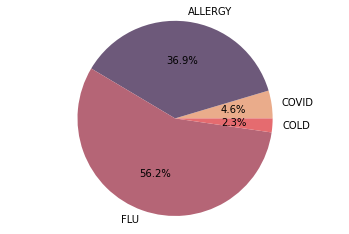

In [24]:
data = [covid_df.shape[0],allergy_df.shape[0], flu_df.shape[0],cold_df.shape[0]]

fig1, ax1 = plt.subplots()
colors = ( "#eaac8b","#6d597a","#b56576", "#e56b6f") 
ax1.pie(data, colors = colors,labels=['COVID', 'ALLERGY','FLU',  'COLD'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()


### Covid data histogram

array([[<AxesSubplot:title={'center':'COUGH'}>,
        <AxesSubplot:title={'center':'MUSCLE_ACHES'}>,
        <AxesSubplot:title={'center':'TIREDNESS'}>,
        <AxesSubplot:title={'center':'SORE_THROAT'}>],
       [<AxesSubplot:title={'center':'RUNNY_NOSE'}>,
        <AxesSubplot:title={'center':'STUFFY_NOSE'}>,
        <AxesSubplot:title={'center':'FEVER'}>,
        <AxesSubplot:title={'center':'NAUSEA'}>],
       [<AxesSubplot:title={'center':'VOMITING'}>,
        <AxesSubplot:title={'center':'DIARRHEA'}>,
        <AxesSubplot:title={'center':'SHORTNESS_OF_BREATH'}>,
        <AxesSubplot:title={'center':'DIFFICULTY_BREATHING'}>],
       [<AxesSubplot:title={'center':'LOSS_OF_TASTE'}>,
        <AxesSubplot:title={'center':'LOSS_OF_SMELL'}>,
        <AxesSubplot:title={'center':'ITCHY_NOSE'}>,
        <AxesSubplot:title={'center':'ITCHY_EYES'}>],
       [<AxesSubplot:title={'center':'ITCHY_MOUTH'}>,
        <AxesSubplot:title={'center':'ITCHY_INNER_EAR'}>,
        <AxesSubplot:title

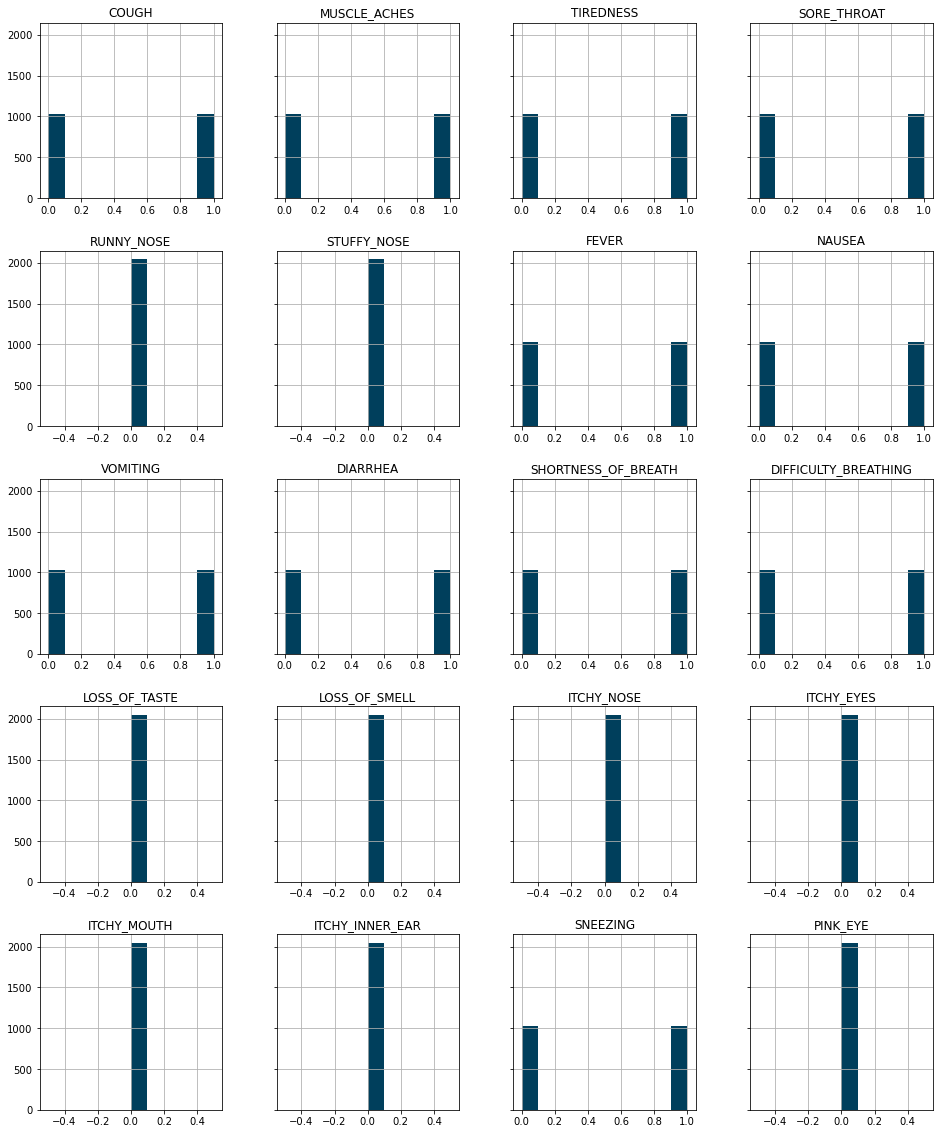

In [25]:
covid_df.hist(figsize=(16, 20), sharey=True, color='#003f5c')

### Flu data histogram

array([[<AxesSubplot:title={'center':'COUGH'}>,
        <AxesSubplot:title={'center':'MUSCLE_ACHES'}>,
        <AxesSubplot:title={'center':'TIREDNESS'}>,
        <AxesSubplot:title={'center':'SORE_THROAT'}>],
       [<AxesSubplot:title={'center':'RUNNY_NOSE'}>,
        <AxesSubplot:title={'center':'STUFFY_NOSE'}>,
        <AxesSubplot:title={'center':'FEVER'}>,
        <AxesSubplot:title={'center':'NAUSEA'}>],
       [<AxesSubplot:title={'center':'VOMITING'}>,
        <AxesSubplot:title={'center':'DIARRHEA'}>,
        <AxesSubplot:title={'center':'SHORTNESS_OF_BREATH'}>,
        <AxesSubplot:title={'center':'DIFFICULTY_BREATHING'}>],
       [<AxesSubplot:title={'center':'LOSS_OF_TASTE'}>,
        <AxesSubplot:title={'center':'LOSS_OF_SMELL'}>,
        <AxesSubplot:title={'center':'ITCHY_NOSE'}>,
        <AxesSubplot:title={'center':'ITCHY_EYES'}>],
       [<AxesSubplot:title={'center':'ITCHY_MOUTH'}>,
        <AxesSubplot:title={'center':'ITCHY_INNER_EAR'}>,
        <AxesSubplot:title

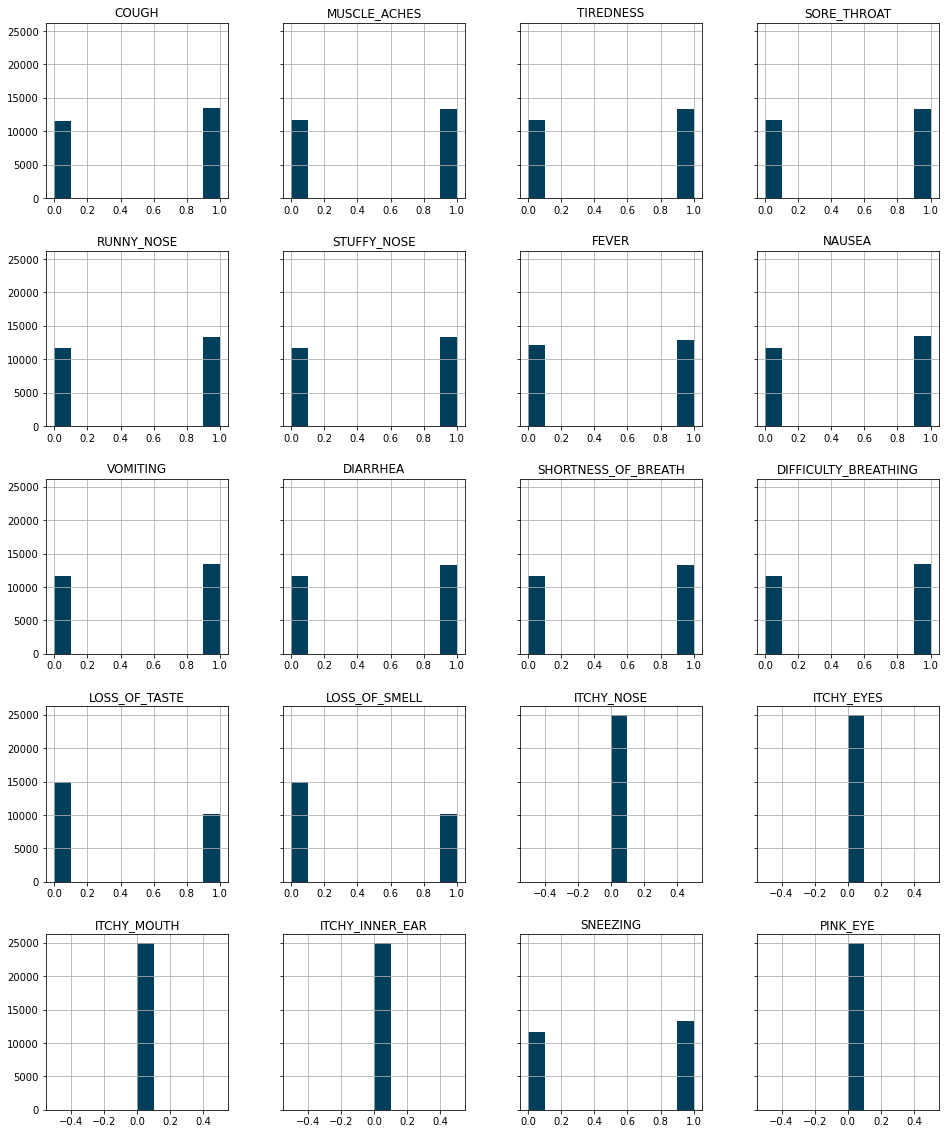

In [26]:
flu_df.hist(figsize=(16, 20), sharey=True, color='#003f5c')

### Allergy data histogram

array([[<AxesSubplot:title={'center':'COUGH'}>,
        <AxesSubplot:title={'center':'MUSCLE_ACHES'}>,
        <AxesSubplot:title={'center':'TIREDNESS'}>,
        <AxesSubplot:title={'center':'SORE_THROAT'}>],
       [<AxesSubplot:title={'center':'RUNNY_NOSE'}>,
        <AxesSubplot:title={'center':'STUFFY_NOSE'}>,
        <AxesSubplot:title={'center':'FEVER'}>,
        <AxesSubplot:title={'center':'NAUSEA'}>],
       [<AxesSubplot:title={'center':'VOMITING'}>,
        <AxesSubplot:title={'center':'DIARRHEA'}>,
        <AxesSubplot:title={'center':'SHORTNESS_OF_BREATH'}>,
        <AxesSubplot:title={'center':'DIFFICULTY_BREATHING'}>],
       [<AxesSubplot:title={'center':'LOSS_OF_TASTE'}>,
        <AxesSubplot:title={'center':'LOSS_OF_SMELL'}>,
        <AxesSubplot:title={'center':'ITCHY_NOSE'}>,
        <AxesSubplot:title={'center':'ITCHY_EYES'}>],
       [<AxesSubplot:title={'center':'ITCHY_MOUTH'}>,
        <AxesSubplot:title={'center':'ITCHY_INNER_EAR'}>,
        <AxesSubplot:title

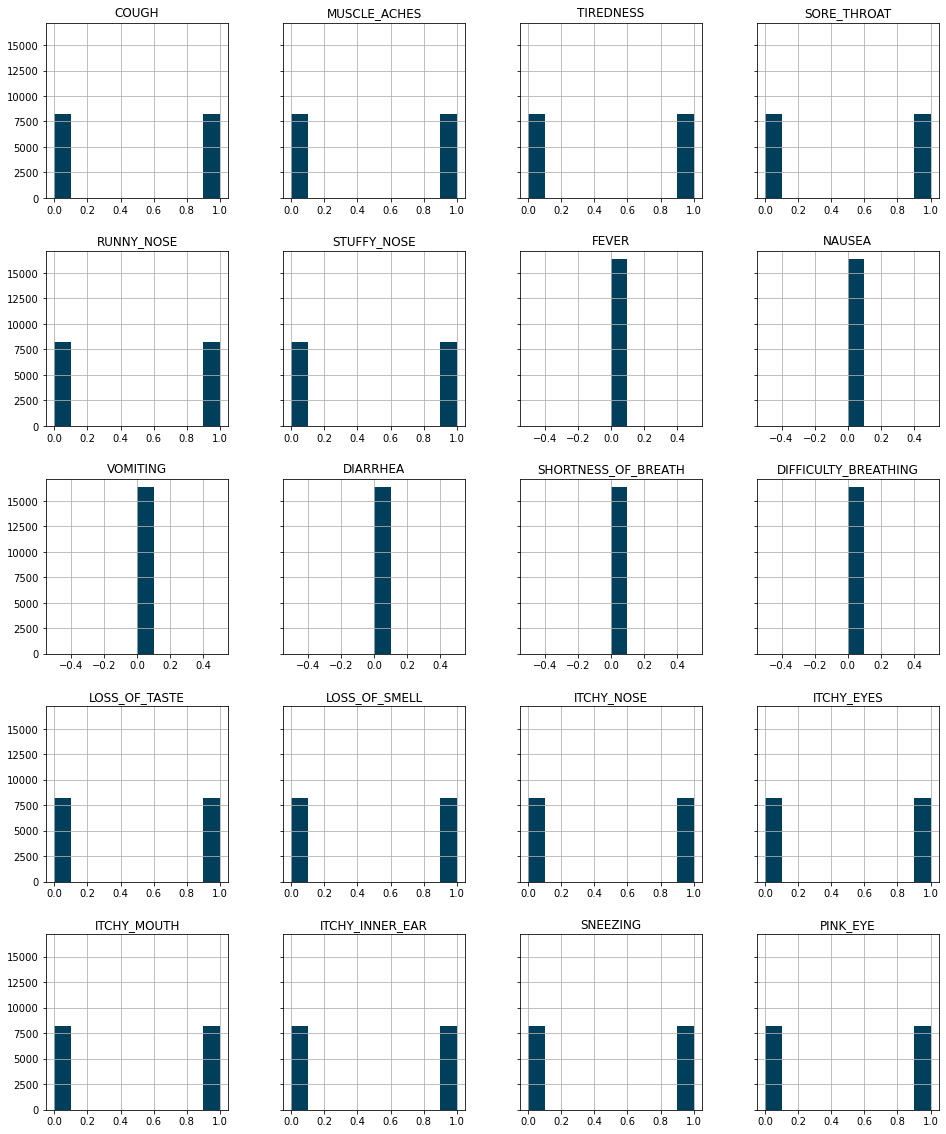

In [27]:
allergy_df.hist(figsize=(16, 20),sharey=True, color='#003f5c')

### Cold data histogram

array([[<AxesSubplot:title={'center':'COUGH'}>,
        <AxesSubplot:title={'center':'MUSCLE_ACHES'}>,
        <AxesSubplot:title={'center':'TIREDNESS'}>,
        <AxesSubplot:title={'center':'SORE_THROAT'}>],
       [<AxesSubplot:title={'center':'RUNNY_NOSE'}>,
        <AxesSubplot:title={'center':'STUFFY_NOSE'}>,
        <AxesSubplot:title={'center':'FEVER'}>,
        <AxesSubplot:title={'center':'NAUSEA'}>],
       [<AxesSubplot:title={'center':'VOMITING'}>,
        <AxesSubplot:title={'center':'DIARRHEA'}>,
        <AxesSubplot:title={'center':'SHORTNESS_OF_BREATH'}>,
        <AxesSubplot:title={'center':'DIFFICULTY_BREATHING'}>],
       [<AxesSubplot:title={'center':'LOSS_OF_TASTE'}>,
        <AxesSubplot:title={'center':'LOSS_OF_SMELL'}>,
        <AxesSubplot:title={'center':'ITCHY_NOSE'}>,
        <AxesSubplot:title={'center':'ITCHY_EYES'}>],
       [<AxesSubplot:title={'center':'ITCHY_MOUTH'}>,
        <AxesSubplot:title={'center':'ITCHY_INNER_EAR'}>,
        <AxesSubplot:title

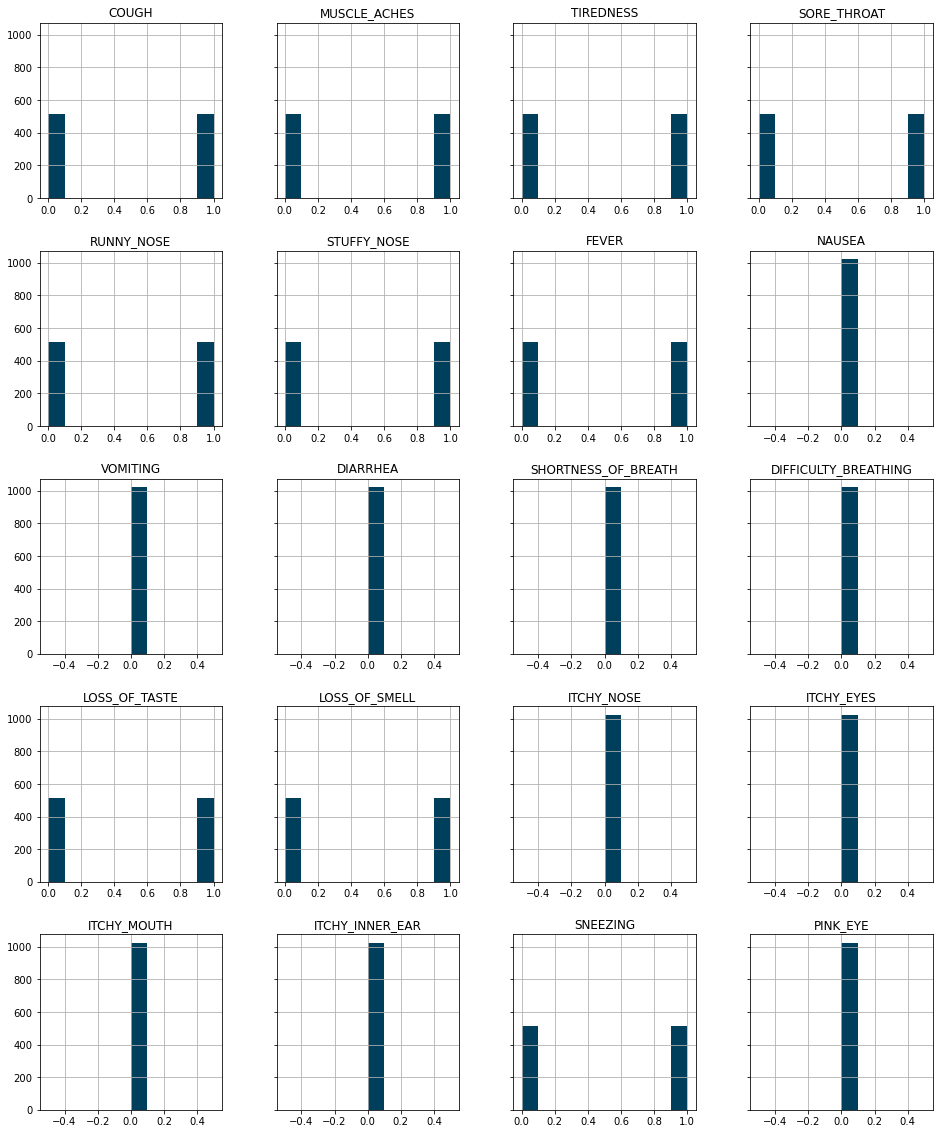

In [28]:
cold_df.hist(figsize=(16, 20), sharey=True, color='#003f5c')

## Data Preprocessing

In terms of preprocessing there wasn’t much we could find useful in our case because there were no missing values, no way we could classify any data as duplicate, no outliers and no attributes that were correlated enough to aggregate.

**Treat type as categorical data**

We switched the data type of  ‘type’ from object to a category.

In [29]:
df['TYPE'] = df['TYPE'].astype('category')

input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values

### Train and Split

We generated train and test datasets, being the train 25% of the entire dataset. Also, the stratify option was used to maintain the original class distribution, as the dataset is imbalanced.

In [30]:
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1, stratify=all_labels)

**Undersampling and oversampling data**

As stated before, our dataset is imbalanced as it is possible to confirm in the pie chart of the first section. 

As this was affecting the accuracy obtained by the classifier, we did undersampling and oversampling using random.

Oversampling and undersampling are techniques used to adjust the class distribution of a data set. Undersampling techniques remove examples from the training dataset that belong to the majority class. Oversampling involves adding examples to the minority class.

We've split the dataset into input and label sets to use it in the classifiers.


In [31]:
input_names = list(df.columns)
input_names.remove('TYPE')

all_inputs = df[input_names].values
all_labels = df['TYPE'].values


from imblearn.under_sampling import RandomUnderSampler

ranmdom_under_sampler = RandomUnderSampler()

undersampled_inputs, undersampled_labels = ranmdom_under_sampler.fit_resample(training_inputs, training_classes)



from imblearn.over_sampling import SMOTE

random_over_sampler = SMOTE()

oversampled_inputs, oversampled_labels = random_over_sampler.fit_resample(training_inputs, training_classes)


**Scaler**

We standardized our data scale so all the data was used in the same scale and contribute equally to the model fitting, as it is a good practice to these algorithms.

In [32]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(training_inputs)
training_inputs = scaler.transform(training_inputs)
testing_inputs = scaler.transform(testing_inputs) 

scaler.fit(undersampled_inputs)
undersampled_inputs = scaler.transform(undersampled_inputs)

scaler.fit(oversampled_inputs)
oversampled_inputs = scaler.transform(oversampled_inputs)


## Supervised Learning

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

### Decision Tree Classifier

This classifier uses the Decision Tree algorithm, whose goal is to predict the value of a target variable by learning simple decision rules inferred from the data features.

We applied this algorithm for the Original dataset, an undersampled dataset and an oversampled dataset.

In [34]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_classes)
dtc_all_predictions = decision_tree_classifier.predict(testing_inputs)

decision_tree_classifier.fit(undersampled_inputs, undersampled_labels)
dtc_under_predictions = decision_tree_classifier.predict(testing_inputs)

decision_tree_classifier.fit(oversampled_inputs, oversampled_labels)
dtc_over_predictions = decision_tree_classifier.predict(testing_inputs)

dtc_all_report = classification_report(testing_classes, dtc_all_predictions, output_dict=True)
dtc_under_report = classification_report(testing_classes, dtc_under_predictions, output_dict=True)
dtc_over_report = classification_report(testing_classes, dtc_over_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_all_predictions)}\n\nClassification report:\n {classification_report(testing_classes, dtc_all_predictions)}\n")
print(f"Undersampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_under_predictions)}\n\nClassification report:\n {classification_report(testing_classes, dtc_under_predictions)}\n")
print(f"Oversampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_over_predictions)}\n\nClassification report:\n {classification_report(testing_classes, dtc_over_predictions)}\n")

with open("./reports/dtc_classification_all_report.json", "w") as outfile:
    json.dump(dtc_all_report, outfile)
with open("./reports/dtc_classification_under_report.json", "w") as outfile:
    json.dump(dtc_under_report, outfile)
with open("./reports/dtc_classification_over_report.json", "w") as outfile:
    json.dump(dtc_over_report, outfile)

Original dataset:
 Confusion matrix: 
[[3978  106    2   10]
 [ 115   75    9   57]
 [  10    6  100  396]
 [  47   68  449 5686]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.97      0.96      4096
        COLD       0.29      0.29      0.29       256
       COVID       0.18      0.20      0.19       512
         FLU       0.92      0.91      0.92      6250

    accuracy                           0.89     11114
   macro avg       0.59      0.59      0.59     11114
weighted avg       0.89      0.89      0.89     11114


Undersampled dataset:
 Confusion matrix: 
[[3967  125    2    2]
 [  21  218   10    7]
 [   0   18  446   48]
 [   6  113  483 5648]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.99      0.97      0.98      4096
        COLD       0.46      0.85      0.60       256
       COVID       0.47      0.87      0.61       512
         FLU       0.99      0.

### Support Vector Classification

This classifier uses the Support Vector Machines algorithm, whose learning problem is formulated as a convex optimization problem and is robust to noise.

We applied this algorithm for the Original dataset, an undersampled dataset and an oversampled dataset.

In [35]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(training_inputs, training_classes)
svc_all_predictions = svc.predict(testing_inputs)

svc.fit(undersampled_inputs, undersampled_labels)
svc_under_predictions = svc.predict(testing_inputs)

svc.fit(oversampled_inputs, oversampled_labels)
svc_over_predictions = svc.predict(testing_inputs)

svc_all_report = classification_report(testing_classes, svc_all_predictions, output_dict=True)
svc_under_report = classification_report(testing_classes, svc_under_predictions, output_dict=True)
svc_over_report = classification_report(testing_classes, svc_over_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_all_predictions)}\n\nClassification report:\n {classification_report(testing_classes, svc_all_predictions)}\n")
print(f"Undersampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_under_predictions)}\n\nClassification report:\n {classification_report(testing_classes, svc_under_predictions)}\n")
print(f"Oversampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_over_predictions)}\n\nClassification report:\n {classification_report(testing_classes, svc_over_predictions)}\n")

with open("./reports/svc_classification_all_report.json", "w") as outfile:
    json.dump(svc_all_report, outfile)
with open("./reports/svc_classification_under_report.json", "w") as outfile:
    json.dump(svc_under_report, outfile)
with open("./reports/svc_classification_over_report.json", "w") as outfile:
    json.dump(svc_over_report, outfile)

Original dataset:
 Confusion matrix: 
[[4067   29    0    0]
 [ 130  119    7    0]
 [  11    3  213  285]
 [  58   57  316 5819]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.95      0.99      0.97      4096
        COLD       0.57      0.46      0.51       256
       COVID       0.40      0.42      0.41       512
         FLU       0.95      0.93      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.72      0.70      0.71     11114
weighted avg       0.92      0.92      0.92     11114


Undersampled dataset:
 Confusion matrix: 
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  493    0]
 [   1  119  484 5646]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.50      0.96      0.66       512
         FLU       1.00      0.

### K-Nearest Neighbors

We applied this algorithm for the Original dataset, an undersampled dataset and an oversampled dataset.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(training_inputs, training_classes)
knn_all_predictions = knn.predict(testing_inputs)

knn.fit(undersampled_inputs, undersampled_labels)
knn_under_predictions = knn.predict(testing_inputs)

knn.fit(oversampled_inputs, oversampled_labels)
knn_over_predictions = knn.predict(testing_inputs)

knn_all_report = classification_report(testing_classes, knn_all_predictions, output_dict=True)
knn_under_report = classification_report(testing_classes, knn_under_predictions, output_dict=True)
knn_over_report = classification_report(testing_classes, knn_over_predictions, output_dict=True)


print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_all_predictions)}\n\nClassification report:\n {classification_report(testing_classes, knn_all_predictions)}\n")
print(f"Undersampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_under_predictions)}\n\nClassification report:\n {classification_report(testing_classes, knn_under_predictions)}\n")
print(f"Oversampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_over_predictions)}\n\nClassification report:\n {classification_report(testing_classes, knn_over_predictions)}\n")

with open("./reports/knn_classification_all_report.json", "w") as outfile:
    json.dump(knn_all_report, outfile)
with open("./reports/knn_classification_under_report.json", "w") as outfile:
    json.dump(knn_under_report, outfile)
with open("./reports/knn_classification_over_report.json", "w") as outfile:
    json.dump(knn_over_report, outfile)

Original dataset:
 Confusion matrix: 
[[4010   79    0    7]
 [ 109  115    0   32]
 [   8    8   23  473]
 [  43   69  146 5992]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.96      0.98      0.97      4096
        COLD       0.42      0.45      0.44       256
       COVID       0.14      0.04      0.07       512
         FLU       0.92      0.96      0.94      6250

    accuracy                           0.91     11114
   macro avg       0.61      0.61      0.60     11114
weighted avg       0.89      0.91      0.90     11114


Undersampled dataset:
 Confusion matrix: 
[[3595  500    1    0]
 [   1  253    2    0]
 [   0   17  491    4]
 [   3  763 2525 2959]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.88      0.93      4096
        COLD       0.17      0.99      0.28       256
       COVID       0.16      0.96      0.28       512
         FLU       1.00      0.

### Neural Networks

We applied this algorithm for the Original dataset, an undersampled dataset and an oversampled dataset.

In [37]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()

nn.fit(training_inputs, training_classes)
nn_all_predictions = nn.predict(testing_inputs)

nn.fit(undersampled_inputs, undersampled_labels)
nn_under_predictions = nn.predict(testing_inputs)

nn.fit(oversampled_inputs, oversampled_labels)
nn_over_predictions = nn.predict(testing_inputs)

nn_all_report = classification_report(testing_classes, nn_all_predictions, output_dict=True)
nn_under_report = classification_report(testing_classes, nn_under_predictions, output_dict=True)
nn_over_report = classification_report(testing_classes, nn_over_predictions, output_dict=True)

print(f"Original dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_all_predictions)}\n\nClassification report:\n {classification_report(testing_classes, nn_all_predictions)}\n")
print(f"Undersampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_under_predictions)}\n\nClassification report:\n {classification_report(testing_classes, nn_under_predictions)}\n")
print(f"Oversampled dataset:\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_over_predictions)}\n\nClassification report:\n {classification_report(testing_classes, nn_over_predictions)}\n")

with open("./reports/nn_classification_all_report.json", "w") as outfile:
    json.dump(nn_all_report, outfile)
with open("./reports/nn_classification_under_report.json", "w") as outfile:
    json.dump(nn_under_report, outfile)
with open("./reports/nn_classification_over_report.json", "w") as outfile:
    json.dump(nn_over_report, outfile)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Original dataset:
 Confusion matrix: 
[[3971  105    0   20]
 [  24  161   10   61]
 [   4    8  192  308]
 [   7   88  341 5814]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.99      0.97      0.98      4096
        COLD       0.44      0.63      0.52       256
       COVID       0.35      0.38      0.36       512
         FLU       0.94      0.93      0.93      6250

    accuracy                           0.91     11114
   macro avg       0.68      0.73      0.70     11114
weighted avg       0.92      0.91      0.92     11114


Undersampled dataset:
 Confusion matrix: 
[[3954  131   11    0]
 [   0  248    8    0]
 [   0   16  496    0]
 [   0  143  490 5617]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.46      0.97      0.62       256
       COVID       0.49      0.97      0.65       512
         FLU       1.00      0.

## Parameter Tuning using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

### Decision Tree Classifier

In [39]:
dtc_param_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [13, 14, 15, 16, 17],
                  'max_features': [10, 11, 12, 13, 14],
                  'class_weight' : [None, {'ALLERGY':1, 'FLU':1, 'COVID':1, 'COLD':2}]}

dtc_grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=dtc_param_grid,
                           cv=10,
                           verbose=3)

**Original dataset**

In [40]:
dtc_grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

dtc = dtc_grid_search.best_estimator_
dtc_prediction = dtc.predict(testing_inputs)
best_report = classification_report(testing_classes, dtc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, dtc_prediction)}\n")

with open("./reports/dtc_tunning_all_report.json", "w") as outfile:
    json.dump(best_report, outfile)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.929, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.920, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.929, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.929, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.918, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=random, score=0.929, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=ra

[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.928, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=random, score=0.933, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=random, score=0.923, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitte

[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.924, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.927, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.923, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11,

[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.930, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.923, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.915, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.916, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.923, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.922, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.912, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.924, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.913, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.915, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.921, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.918, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.916, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.912, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best

[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.922, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.912, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.916, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.920, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=12, splitter=best 


[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.918, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.921, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.912, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.910, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=14, splitter=random

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.904, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.910, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random, score=0.903, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random, score=0.901, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random, score=0.919, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, spl

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=best, score=0.911, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.912, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.910, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.911, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.913, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13,

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random, score=0.924, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random, score=0.931, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=random, score=0.931, total=   0.0s
[CV] class_weight=None, criterion=entropy

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random, score=0.928, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random, score=0.928, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random, score=0.927, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.932, total=   0.1s
[CV] class_weight=None, criterion=entropy, ma

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.932, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=best, score=0.929, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=best, score=0.924, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_de

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=random, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.924, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.930, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.921, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best, score=0.923, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=best, score=0.929, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=random, score=0.916, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=random, score=0.919, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.921, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.926, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.915, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.925, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.921, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.927, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best, score=0.896, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best, score=0.922, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best, score=0.918, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=best, score=0.915, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, ma

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.911, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.920, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.918, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.911, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.918, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, ma

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.922, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.917, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.923, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.918, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.919, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=16, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.913, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.918, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.911, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.914, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.906, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.914, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.915, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.912, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.899, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.909, total=   0.1s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.931, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.920, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.937,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.934, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.932, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best, score=0.935, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best, score=0.933, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best, score=0.929, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=best, score=0.934,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random, score=0.928, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random, score=0.933, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random, score=0.930, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=14, splitter=random

[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.916, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.929, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.932, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_w

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random, score=0.927, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random, score=0.933, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.916, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.930, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best, score=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=best, score=0.919, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=best, score=0.915, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=best, score=0.924, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=random, score=0.922, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=random, score=0.904, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=random, score=0.915, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best, sc

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=best, score=0.913, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=best, score=0.922, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random, score=0.924, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random, scor

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.914, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.920, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=best, score=0.909, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=best, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.918, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random, scor

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random, score=0.911, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random, score=0.918, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.929, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.920, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.911, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=best, score=0.913, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.912, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.908, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.904, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.918, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.920, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.908, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.910,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.912, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.913, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.932, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.923, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.931, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.927, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.923, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.927, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.928, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.929, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.930, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.927, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.932, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=random, score=0.928, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.926, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.915, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.925, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.923, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.893, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=random, score=0.919, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.915, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.909, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.920, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.911, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random, score=0.923, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random, score=0.924, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.911, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.918, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.924, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random, score=0.910, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random, score=0.921, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random, score=0.919, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.919, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best, score=0.916, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.915, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.895, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.909, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random, score=0.917, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random, score=0.902, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random, score=0.900, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.909, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.913, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best, score=0.906, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=13, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random, score=0.907, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random, score=0.910, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random, score=0.913, total=   0.1s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_feature

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  2.9min finished


Best score: 0.9300817334282918
Best parameters: {'class_weight': {'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, 'criterion': 'gini', 'max_depth': 13, 'max_features': 12, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(class_weight={'ALLERGY': 1, 'COLD': 2, 'COVID': 1,
                                     'FLU': 1},
                       max_depth=13, max_features=12, splitter='random')
---  ---

Improved original dataset
 Confusion matrix: 
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  168  325]
 [   0  119  265 5866]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.39      0.33      0.36       512
         FLU       0.95      0.94      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.71      0.81      0.73     11114
weighted avg       0.93      0.92      0.

**Undersampled dataset**

In [41]:
dtc_grid_search.fit(undersampled_inputs, undersampled_labels)
print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

dtc = dtc_grid_search.best_estimator_
dtc_prediction = dtc.predict(testing_inputs)
best_us_report = classification_report(testing_classes, dtc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved undersampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, dtc_prediction)}\n")

with open("./reports/dtc_tunning_under_report.json", "w") as outfile:
    json.dump(best_us_report, outfile)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.955, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.967, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.967, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_dept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=best, score=0.945, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=best, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=best, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=11, splitte

[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.945, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.971, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.967, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 


[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=random, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=14, splitter=random, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=14, splitte

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.941, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitte

[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.912, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.941, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=random, score=0.912, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=10, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=10, splitte

[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.964, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13,

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=11, splitter=random, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=11, splitte

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.929, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=best 


[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.945, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=entropy

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.945, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.961, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.958, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=entropy

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.958, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=entropy, 

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.948, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.935, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.915, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, ma

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.928, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.909, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.916, total=   0.0s
[CV] class_weight=None, criterion=entropy, ma

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.954, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.938, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.906, total=   0.0s
[CV] class_weight=None, criterion=entropy

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.922, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.942, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_dept

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.945, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.925, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.932, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=13, splitter=random, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.919, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.903, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.967, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.951, total=   0.0s
[CV] class_weight=None, criterion=entropy, max_depth=17, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=best, score=0.941, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, score=0.948, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=11, splitter=random, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.951, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.945, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.941, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.948, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.961, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.951, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.941,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.928, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.916, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.942, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=random, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.958, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.948, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.912, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.925, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.928, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.928, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.912,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=best, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random, score=0.929, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=12, splitter=random, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.899, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.945, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=best, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=10, splitter=best, score=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.941, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.922, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.

[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=random, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=random, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=random 
[CV

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.961, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.954, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.915, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.941, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=best, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=best, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.951, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.945, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.928, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.922, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.951, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.945, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=random, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=random, score=0.942, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.922, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.919, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.925, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=11, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.925, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.916, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.938, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.925, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.932, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.935, total=   0.0s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitt

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   16.5s finished


---  ---

Improved undersampled dataset
 Confusion matrix: 
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  471   22]
 [   0  119  470 5661]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.50      0.92      0.65       512
         FLU       1.00      0.91      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.75      0.95      0.81     11114
weighted avg       0.96      0.93      0.94     11114




**Oversampled dataset**

In [42]:
dtc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(dtc_grid_search.best_score_))
print('Best parameters: {}'.format(dtc_grid_search.best_params_))
print('Best estimator: {}'.format(dtc_grid_search.best_estimator_))

dtc = dtc_grid_search.best_estimator_
dtc_prediction = dtc.predict(testing_inputs)
best_os_report = classification_report(testing_classes, dtc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved oversampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, dtc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, dtc_prediction)}\n")

with open("./reports/dtc_tunning_over_report.json", "w") as outfile:
    json.dump(best_os_report, outfile)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.957, total=   0.1s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.954, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=10, splitter=best 


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.955, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.955, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.952, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.952, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=12, splitter=best 


[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.952, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=best, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=13, max_features=14, splitter=random

[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.942, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=best, score=0.952, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.962, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=11, splitte

[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.952, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=14, max_features=13, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=14, max_features=13, spl

[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.956, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.961, total=   0.7s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.960, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=12, splitter=random, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=15, max_features=14, splitter=random, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=15, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.957, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.960, total=   0.3s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=16, max_features=13, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=16, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.956, total=   0.4s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=10, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=1

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.955, total=   0.4s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=13, splitter=best, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=13, s

[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=random, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=random 
[CV]  class_weight=None, criterion=gini, max_depth=17, max_features=14, splitter=random, score=0.953, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.956, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_f

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.953, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.952, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=12, splitter=best, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=13, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=13, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best, score=0.961, total=   0.8s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best, score=0.957, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=13, max_features=14, splitter=best, score=0.955, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=random, score=0.952, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=10, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.957, total=   0.6s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=12, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=13, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=

[CV]  class_weight=None, criterion=entropy, max_depth=14, max_features=14, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, 

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=12, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, 

[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=13, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.962, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=15, 

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.953, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=11, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, 

[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=16, max_features=13, splitter=best, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=16, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.959, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.962, total=   0.4s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.959, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best, score=0.961, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best, score=0.958, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best, score=0.956, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best, score=0.962, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=12, splitter=best, score=0.959, total=   0.3s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.960, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.957, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.962, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight=None, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.959, total=   0.2s
[CV] class_weight=None, criterion=entropy, max_depth=17, ma

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random, score=0.957, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random, score=0.955, total=   0.9s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random, score=0.952, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=10, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.960, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.959, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.956, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=12, splitter=best, score=0.955,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.956, total=   0.9s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.960, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=13, max_features=13, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=10, splitter=best, score=0.958,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random, score=0.956, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=11, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=12, splitter=random, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.960, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.958, total=   0.7s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=13, splitter=best, score=0.95

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=random, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=14, max_features=14, splitter=random, scor

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.954, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=10, splitter=random, score=0.950, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=11, splitter=best, sc

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=12, splitter=best, score=0.953,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=15, max_features=13, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.959, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=10, splitter=best, score=0.957,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.959, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=11, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.962, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=13, splitter=best, score=0.957,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random, score=0.961, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=16, max_features=14, splitter=random

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.961, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=11, splitter=best, score=0.961,

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=12, splitter=random, 

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.954, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=13, splitter=random, score=0.954, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best, score=0.960, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=gini, max_depth=17, max_features=14, splitter=best, score=

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.948, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=best, score=0.952, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=10, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.952, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random, score=0.956, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.959, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best, score=0.955, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=13, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.957, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.955, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=13, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=10, splitter=random, score=0.951, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=11, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.951, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=best, score=0.953, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=12, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.956, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=14, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.959, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=10, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.958, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random, score=0.962, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=12, splitter=random, score=0.954, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.961, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best, score=0.958, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=13, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.954, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=15, max_features=14, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=10, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.962, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=12, splitt

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.958, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random, score=0.961, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=13, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=16, max_features=14, splitter=random, score=0.953, total=   0.4s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.960, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best, score=0.957, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=10, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.957, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.954, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=best, score=0.953, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=11, spli

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.956, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.956, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random, score=0.958, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=12, splitter=random 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_feature

[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.962, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.960, total=   0.2s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best, score=0.957, total=   0.3s
[CV] class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitter=best 
[CV]  class_weight={'ALLERGY': 1, 'FLU': 1, 'COVID': 1, 'COLD': 2}, criterion=entropy, max_depth=17, max_features=14, splitt

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  7.9min finished


Best score: 0.9578133333333334
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 17, 'max_features': 11, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=17, max_features=11,
                       splitter='random')
---  ---

Improved oversampled dataset
 Confusion matrix: 
[[3967  129    0    0]
 [   0  209    7   40]
 [   0   15  189  308]
 [   0  115  609 5526]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.45      0.82      0.58       256
       COVID       0.23      0.37      0.29       512
         FLU       0.94      0.88      0.91      6250

    accuracy                           0.89     11114
   macro avg       0.66      0.76      0.69     11114
weighted avg       0.92      0.89      0.90     11114




### Support Vector Classification 

In [43]:
svc_param_grid = {'C' : [0.1, 1, 10, 100], 
            'gamma' : ['scale', 'auto'],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_grid_search = GridSearchCV(SVC(),
                           param_grid=svc_param_grid,
                           cv=5,
                           verbose=3, n_jobs=1)

**Original dataset**

In [44]:
svc_grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(svc_grid_search.best_score_))
print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Best estimator: {}'.format(svc_grid_search.best_estimator_))


svc = svc_grid_search.best_estimator_
svc_prediction = svc.predict(testing_inputs)
best_report = classification_report(testing_classes, svc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, svc_prediction)}\n")

with open("./reports/svc_tunning_all_report.json", "w") as outfile:
    json.dump(best_report, outfile)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.933, total=   3.8s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.932, total=   2.6s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.933, total=   2.7s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.933, total=   2.6s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.927, total=   2.6s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.921, total=   8.1s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.922, total=   7.4s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.921, total=   7.7s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.920, total=   8.8s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .

[CV] ...... C=1, gamma=auto, kernel=linear, score=0.931, total=   3.3s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.933, total=   3.6s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.933, total=   3.6s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.933, total=   3.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.927, total=   3.1s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.927, total=   6.4s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.927, total=   6.4s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] .

[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.932, total=   3.2s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.934, total=   3.3s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.931, total= 3.8min
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.933, total= 4.3min
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.933, total= 4.1min
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.933, total= 1.7min
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.928, total= 2.5min
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 47.4min finished


Best score: 0.935870904415187
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best estimator: SVC(C=1, kernel='sigmoid')
---  ---

Improved original dataset
 Confusion matrix: 
[[4096    0    0    0]
 [ 133  119    4    0]
 [  10    4  281  217]
 [  63   53  210 5924]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       0.95      1.00      0.98      4096
        COLD       0.68      0.46      0.55       256
       COVID       0.57      0.55      0.56       512
         FLU       0.96      0.95      0.96      6250

    accuracy                           0.94     11114
   macro avg       0.79      0.74      0.76     11114
weighted avg       0.94      0.94      0.94     11114




**Undersampled dataset**

In [45]:
svc_grid_search.fit(undersampled_inputs, undersampled_labels)
print('Best score: {}'.format(svc_grid_search.best_score_))
print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Best estimator: {}'.format(svc_grid_search.best_estimator_))


svc = svc_grid_search.best_estimator_
svc_prediction = svc.predict(testing_inputs)
best_us_report = classification_report(testing_classes, svc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved undersampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, svc_prediction)}\n")

with open("./reports/svc_tunning_under_report.json", "w") as outfile:
    json.dump(best_us_report, outfile)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.964, total=   0.1s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.974, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.959, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.950, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.956, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.862, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.865, total=   0.3s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.868, total=   0.5s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.857, total=   0.3s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.857, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.964, total=   0.2s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] .

[CV] ........ C=1, gamma=auto, kernel=poly, score=0.961, total=   0.1s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.971, total=   0.1s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.954, total=   0.1s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.943, total=   0.1s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.954, total=   0.1s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.964, total=   0.1s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ......... C=1, gamma=auto, kernel=rbf, score=0.974, total=   0.2s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] .

[CV] ... C=100, gamma=scale, kernel=linear, score=0.950, total=   1.4s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ... C=100, gamma=scale, kernel=linear, score=0.954, total=   0.2s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] ..... C=100, gamma=scale, kernel=poly, score=0.857, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] ..... C=100, gamma=scale, kernel=poly, score=0.901, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] ..... C=100, gamma=scale, kernel=poly, score=0.858, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] ..... C=100, gamma=scale, kernel=poly, score=0.886, total=   0.1s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] ..... C=100, gamma=scale, kernel=poly, score=0.868, total=   0.1s
[CV] C=100, gamma=scale, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   26.2s finished


Best score: 0.9606064458038718
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best estimator: SVC(C=0.1, kernel='linear')
---  ---

Improved undersampled dataset
 Confusion matrix: 
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  493    0]
 [   0  119  484 5647]]

Classification report:
               precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.50      0.96      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.75      0.96      0.81     11114
weighted avg       0.97      0.93      0.94     11114




**Oversampled dataset**

In [ ]:
svc_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(svc_grid_search.best_score_))
print('Best parameters: {}'.format(svc_grid_search.best_params_))
print('Best estimator: {}'.format(svc_grid_search.best_estimator_))


svc = svc_grid_search.best_estimator_
svc_prediction = svc.predict(testing_inputs)
best_os_report = classification_report(testing_classes, svc_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved oversampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, svc_prediction)}\n\nClassification report:\n {classification_report(testing_classes, svc_prediction)}\n")

with open("./reports/svc_tunning_over_report.json", "w") as outfile:
    json.dump(best_os_report, outfile)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.959, total=   7.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.958, total=   7.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s


[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.957, total=   7.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.956, total=   6.8s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ... C=0.1, gamma=scale, kernel=linear, score=0.953, total=   8.3s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.959, total=  33.2s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.958, total=  36.3s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.957, total=  39.9s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] ..... C=0.1, gamma=scale, kernel=poly, score=0.956, total=  35.6s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .

[CV] ...... C=1, gamma=auto, kernel=linear, score=0.959, total=   9.7s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.958, total=  10.5s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.957, total=  10.5s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.956, total=  15.0s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.953, total=  18.2s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.960, total=  38.7s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ........ C=1, gamma=auto, kernel=poly, score=0.959, total=  42.8s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] .

[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.909, total=  25.8s
[CV] C=10, gamma=auto, kernel=sigmoid ................................
[CV] .... C=10, gamma=auto, kernel=sigmoid, score=0.908, total=  30.7s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] .. C=100, gamma=scale, kernel=linear, score=0.959, total=370.5min
[CV] C=100, gamma=scale, kernel=linear ...............................


### KNN

In [ ]:
knn_param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9, 19],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['ball_tree', 'kd_tree', 'brute']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=knn_parameter_grid,
                           cv=10,verbose=4,n_jobs=-1)

**Original dataset**

In [ ]:
knn_grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))
print('Best estimator: {}'.format(knn_grid_search.best_estimator_))

knn = knn_grid_search.best_estimator_
knn_prediction = knn.predict(testing_inputs)
best_report = classification_report(testing_classes, knn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, knn_prediction)}\n")

with open("./reports/knn_tunning_all_report.json", "w") as outfile:
    json.dump(best_report, outfile)

**Undersampled dataset**

In [ ]:
knn_grid_search.fit(undersampled_inputs, undersampled_classes)
print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))
print('Best estimator: {}'.format(knn_grid_search.best_estimator_))

knn = knn_grid_search.best_estimator_
knn_prediction = knn.predict(testing_inputs)
best_us_report = classification_report(testing_classes, knn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved undersampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, knn_prediction)}\n")

with open("./reports/knn_tunning_under_report.json", "w") as outfile:
    json.dump(best_us_report, outfile)

**Oversampled dataset**

In [ ]:
knn_grid_search.fit(oversampled_inputs, oversampled_classes)
print('Best score: {}'.format(knn_grid_search.best_score_))
print('Best parameters: {}'.format(knn_grid_search.best_params_))
print('Best estimator: {}'.format(knn_grid_search.best_estimator_))

knn = knn_grid_search.best_estimator_
knn_prediction = knn.predict(testing_inputs)
best_os_report = classification_report(testing_classes, knn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved oversampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, knn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, knn_prediction)}\n")

with open("./reports/knn_tunning_over_report.json", "w") as outfile:
    json.dump(best_os_report, outfile)

### Neural Networks

In [ ]:
nn_param_grid = {'solver': ['adam'],
    'activation' : ['tanh', 'logistic', 'identity', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01], 
    'hidden_layer_sizes': [10, 50, 100],
    'max_iter' : [500]}

nn_grid_search = GridSearchCV(MLPClassifier(), 
                        param_grid=nn_param_grid, 
                        cv=10,
                        verbose=3, n_jobs=-1)

**Original dataset**

In [ ]:
nn_grid_search.fit(training_inputs, training_classes)
print('Best score: {}'.format(nn_grid_search.best_score_))
print('Best parameters: {}'.format(nn_grid_search.best_params_))
print('Best estimator: {}'.format(nn_grid_search.best_estimator_))


nn = nn_grid_search.best_estimator_
nn_prediction = nn.predict(testing_inputs)
best_report = classification_report(testing_classes, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved original dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, nn_prediction)}\n")

with open("./reports/nn_tunning_all_report.json", "w") as outfile:
    json.dump(best_report, outfile)

**Undersampled dataset**

In [ ]:
nn_grid_search.fit(undersampled_inputs, undersampled_labels)
print('Best score: {}'.format(nn_grid_search.best_score_))
print('Best parameters: {}'.format(nn_grid_search.best_params_))
print('Best estimator: {}'.format(nn_grid_search.best_estimator_))


nn = nn_grid_search.best_estimator_
nn_prediction = nn.predict(testing_inputs)
best_us_report = classification_report(testing_classes, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved undersampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, nn_prediction)}\n")

with open("./reports/nn_tunning_under_report.json", "w") as outfile:
    json.dump(best_us_report, outfile)

**Oversampled dataset**

In [ ]:
nn_grid_search.fit(oversampled_inputs, oversampled_labels)
print('Best score: {}'.format(nn_grid_search.best_score_))
print('Best parameters: {}'.format(nn_grid_search.best_params_))
print('Best estimator: {}'.format(nn_grid_search.best_estimator_))


nn = nn_grid_search.best_estimator_
nn_prediction = nn.predict(testing_inputs)
best_os_report = classification_report(testing_classes, nn_prediction, output_dict=True)

print("---  ---\n")
print(f"Improved undersampled dataset\n Confusion matrix: \n{confusion_matrix(testing_classes, nn_prediction)}\n\nClassification report:\n {classification_report(testing_classes, nn_prediction)}\n")

with open("./reports/nn_tunning_over_report.json", "w") as outfile:
    json.dump(best_os_report, outfile)

## Comparing algorithms

In [ ]:
with open("./reports/dtc_classification_all_report.json") as json_file:
    dtc_all_report = json.load(json_file)
with open("./reports/dtc_classification_under_report.json") as json_file:
    dtc_under_report = json.load(json_file)
with open("./reports/dtc_classification_over_report.json") as json_file:
    dtc_over_report = json.load(json_file)

with open("./reports/svc_classification_all_report.json") as json_file:
    svc_all_report = json.load(json_file)
with open("./reports/svc_classification_under_report.json") as json_file:
    svc_under_report = json.load(json_file)
with open("./reports/svc_classification_over_report.json") as json_file:
    svc_over_report = json.load(json_file)

with open("./reports/knn_classification_all_report.json") as json_file:
    knn_all_report = json.load(json_file)
with open("./reports/knn_classification_under_report.json") as json_file:
    knn_under_report = json.load(json_file)
with open("./reports/knn_classification_over_report.json") as json_file:
    knn_over_report = json.load(json_file)

with open("./reports/nn_classification_all_report.json") as json_file:
    nn_all_report = json.load(json_file)
with open("./reports/nn_classification_under_report.json") as json_file:
    nn_under_report = json.load(json_file)
with open("./reports/nn_classification_over_report.json") as json_file:
    nn_over_report = json.load(json_file)


data = [
    [dtc_all_report['accuracy'],svc_all_report['accuracy'],knn_all_report['accuracy'],nn_all_report['accuracy']],
    [dtc_under_report['accuracy'],svc_under_report['accuracy'],knn_under_report['accuracy'],nn_under_report['accuracy']],
    [dtc_over_report['accuracy'],svc_over_report['accuracy'],knn_over_report['accuracy'],nn_over_report['accuracy']]
]

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = '#003f5c', width = 0.25)
ax.bar(X + 0.25, data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
ax.bar(X + 0.50, data[2], color = '#ffa600', width = 0.25)

green_patch = mpatches.Patch(color='#ffa600', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='#bc5090', label='Undersampled dataset')
red_patch = mpatches.Patch(color='#003f5c', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy obtained by each algorithm")

plt.show()

Using the obtained classification reports we can also plot the algorithms' performance for each disease type. Here we can clearly see how important the unbalanced data sampling methods were to improve the score for the covid and cold cases, where the algorithms performed poorly when using the original dataset, since there were very few occurences of these diseases.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

allergy_data = [
    [dtc_all_report['ALLERGY']['f1-score'],svc_all_report['ALLERGY']['f1-score'],knn_all_report['ALLERGY']['f1-score'],nn_all_report['ALLERGY']['f1-score']],
    [dtc_under_report['ALLERGY']['f1-score'],svc_under_report['ALLERGY']['f1-score'],knn_under_report['ALLERGY']['f1-score'],nn_under_report['ALLERGY']['f1-score']],
    [dtc_over_report['ALLERGY']['f1-score'],svc_over_report['ALLERGY']['f1-score'],knn_over_report['ALLERGY']['f1-score'],nn_over_report['ALLERGY']['f1-score']]
]
X = np.arange(4)
axs[0, 0].bar(X + 0.00, allergy_data[0], color = '#003f5c', width = 0.25)
axs[0, 0].bar(X + 0.25, allergy_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[0, 0].bar(X + 0.50, allergy_data[2], color = '#ffa600', width = 0.25)
axs[0, 0].set_title("Allergy f1-score")

flu_data = [
    [dtc_all_report['FLU']['f1-score'],svc_all_report['FLU']['f1-score'],knn_all_report['FLU']['f1-score'],nn_all_report['FLU']['f1-score']],
    [dtc_under_report['FLU']['f1-score'],svc_under_report['FLU']['f1-score'],knn_under_report['FLU']['f1-score'],nn_under_report['FLU']['f1-score']],
    [dtc_over_report['FLU']['f1-score'],svc_over_report['FLU']['f1-score'],knn_over_report['FLU']['f1-score'],nn_over_report['FLU']['f1-score']]
]
X = np.arange(4)
axs[0, 1].bar(X + 0.00, data[0], color = '#003f5c', width = 0.25)
axs[0, 1].bar(X + 0.25, data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[0, 1].bar(X + 0.50, data[2], color = '#ffa600', width = 0.25)
axs[0, 1].set_title("Flu f1-score")

covid_data = [
    [dtc_all_report['COVID']['f1-score'],svc_all_report['COVID']['f1-score'],knn_all_report['COVID']['f1-score'],nn_all_report['COVID']['f1-score']],
    [dtc_under_report['COVID']['f1-score'],svc_under_report['COVID']['f1-score'],knn_under_report['COVID']['f1-score'],nn_under_report['COVID']['f1-score']],
    [dtc_over_report['COVID']['f1-score'],svc_over_report['COVID']['f1-score'],knn_over_report['COVID']['f1-score'],nn_over_report['COVID']['f1-score']]
]
X = np.arange(4)
axs[1, 0].bar(X + 0.00, covid_data[0], color = '#003f5c', width = 0.25)
axs[1, 0].bar(X + 0.25, covid_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[1, 0].bar(X + 0.50, covid_data[2], color = '#ffa600', width = 0.25)
axs[1, 0].set_title("Covid f1-score")

cold_data = [
    [dtc_all_report['COLD']['f1-score'],svc_all_report['COLD']['f1-score'],knn_all_report['COLD']['f1-score'],nn_all_report['COLD']['f1-score']],
    [dtc_under_report['COLD']['f1-score'],svc_under_report['COLD']['f1-score'],knn_under_report['COLD']['f1-score'],nn_under_report['COLD']['f1-score']],
    [dtc_over_report['COLD']['f1-score'],svc_over_report['COLD']['f1-score'],knn_over_report['COLD']['f1-score'],nn_over_report['COLD']['f1-score']]
]
X = np.arange(4)
axs[1, 1].bar(X + 0.00, cold_data[0], color = '#003f5c', width = 0.25)
axs[1, 1].bar(X + 0.25, cold_data[1], color = '#bc5090', width = 0.25, tick_label=['DT', 'SVM', 'KNN', 'NN'])
axs[1, 1].bar(X + 0.50, cold_data[2], color = '#ffa600', width = 0.25)
axs[1, 1].set_title("Cold f1-score")

green_patch = mpatches.Patch(color='#ffa600', label='Oversampled dataset')
blue_patch = mpatches.Patch(color='#bc5090', label='Undersampled dataset')
red_patch = mpatches.Patch(color='#003f5c', label='Original dataset')
plt.legend(handles=[green_patch, blue_patch, red_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

fig.tight_layout()
plt.show()


## Conclusions

With this project we were able to have an introduction to Machine Learning, allowing us to understand how valuable this is.
.....

## References

Documentation used as guidance:
    
* https://scikit-learn.org/stable/


Relevant websites:

* Problem data: https://www.kaggle.com/walterconway/covid-flu-cold-symptoms


* Comparison of Machine Learning Classifiers: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4684714/


* https://www.dovepress.com/predicting-environmental-allergies-from-real-world-data-through-a-mobi-peer-reviewed-fulltext-article-JAA

